## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import os, warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

## Loading the train and test sets

In [2]:
train_path = "/kaggle/input/files1/Malaria Cells/training_set"
test_path = "/kaggle/input/files1/Malaria Cells/testing_set"

In [3]:
os.listdir(train_path)

['Uninfected', 'Parasitized']

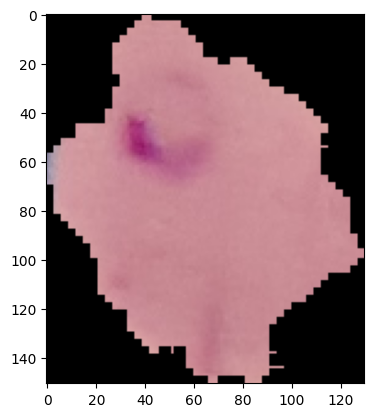

In [4]:
para_cell = imread(train_path + "/Parasitized/" + os.listdir(train_path+"/Parasitized")[0])
plt.imshow(para_cell);

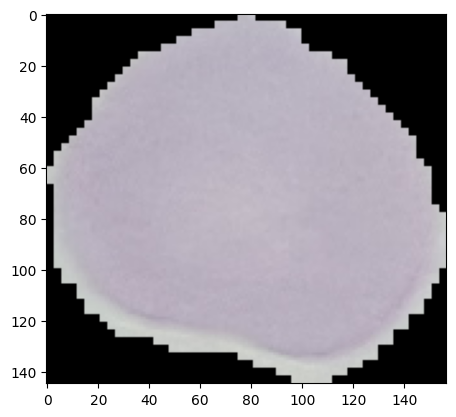

In [5]:
uninfected_cell = imread(train_path + "/Uninfected/" + os.listdir(train_path+"/Uninfected")[0])
plt.imshow(uninfected_cell);

In [6]:
len(os.listdir(train_path + "/Parasitized"))

13780

In [7]:
len(os.listdir(train_path + "/Uninfected"))

13780

In [8]:
len(os.listdir(test_path + "/Parasitized"))

7952

In [9]:
len(os.listdir(test_path + "/Uninfected"))

7880

In [10]:
dim1 = []
dim2 = []

for img_filepath in os.listdir(train_path+"/Uninfected"):
    if str(train_path + "/Uninfected/" + img_filepath).endswith(".png"):
        image = imread(train_path + "/Uninfected/" + img_filepath)
        d1, d2, cc = image.shape
        dim1.append(d1)
        dim2.append(d2)

for img_filepath in os.listdir(train_path+"/Parasitized"):
    if str(train_path + "/Parasitized/" + img_filepath).endswith(".png"):
        image = imread(train_path + "/Parasitized/" + img_filepath)
        d1, d2, cc = image.shape
        dim1.append(d1)
        dim2.append(d2)

In [11]:
np.mean(dim1)

132.9834530807751

In [12]:
np.mean(dim2)

132.48715436533857

In [13]:
final_img_shape = (132,132,3)

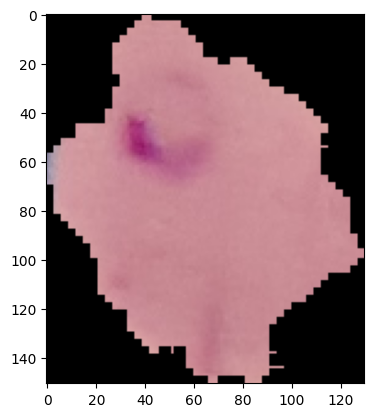

In [14]:
plt.imshow(para_cell);

In [15]:
para_cell.max()

0.85882354

In [16]:
uninfected_cell.max()

0.8392157

## Using Image Data Generator to preprocess images

In [17]:
image_generator = ImageDataGenerator(rotation_range=36,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.1,
                                     zoom_range=0.15,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')
image_generator

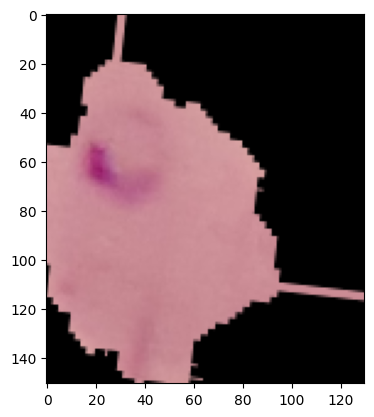

In [18]:
plt.imshow(image_generator.random_transform(para_cell));

In [19]:
image_generator.flow_from_directory(train_path)

Found 27558 images belonging to 2 classes.


In [20]:
image_generator.flow_from_directory(test_path)

Found 15832 images belonging to 2 classes.


## Model Training & Evaluation

In [21]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=final_img_shape))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 130, 130, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 65, 65, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,281 (12.61 MB)

 Trainable params: 3,305,025 (12.61 MB)

 Non-trainable params: 256 (1.00 KB)

In [22]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.1),metrics=['accuracy'])

In [23]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                               target_size=final_img_shape[:-1],
                                                               color_mode='rgb',
                                                               batch_size=32,
                                                               class_mode='binary',
                                                               shuffle=True,
                                                               interpolation='nearest')
train_image_generator

Found 27558 images belonging to 2 classes.


In [24]:
train_image_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [25]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                           target_size=final_img_shape[:-1],
                                                           color_mode='rgb',
                                                           batch_size=32,
                                                           class_mode='binary',
                                                           shuffle=False)
test_image_generator

Found 15832 images belonging to 2 classes.


In [26]:
test_image_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [27]:
log_directory = "logs/" + datetime.now().strftime("%Y-%m-%d--%H-%M")
log_directory

'logs/2024-10-15--00-05'

In [28]:
# Time-based decay schedule
def time_based_decay(epoch, lr):
    decay_rate = 0.01 
    if epoch > 15:
        return lr * 1 / (1 + decay_rate * epoch)
    return lr / np.sqrt(1 + decay_rate * epoch)

In [29]:
es = EarlyStopping(monitor='val_accuracy',mode='max',patience=10,restore_best_weights=True,verbose=1)
mc = ModelCheckpoint('malaria_cell_classifier.keras',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
lrs = LearningRateScheduler(time_based_decay,verbose=1)
tb = TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True,write_images=True,update_freq='epoch',profile_batch=2,embeddings_freq=1)

model.fit(train_image_generator,
          epochs=30,
          batch_size=32,
          validation_data=test_image_generator,
          callbacks=[es,lrs,mc,tb])


Epoch 1: LearningRateScheduler setting learning rate to 0.10000000149011612.
Epoch 1/30


I0000 00:00:1728950710.965370     121 service.cc:145] XLA service 0x7a5fec007cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728950710.965439     121 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728950710.965445     121 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728950715.976884     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5786 - loss: 0.7309
Epoch 1: val_accuracy improved from -inf to 0.50171, saving model to malaria_cell_classifier.keras
862/862 ━━━━━━━━━━━━━━━━━━━━ 295s 333ms/step - accuracy: 0.5786 - loss: 0.7308 - val_accuracy: 0.5017 - val_loss: 1.0003 - learning_rate: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.09950372050371988.
Epoch 2/30
861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6012 - loss: 0.7065
Epoch 2: val_accuracy improved from 0.50171 to 0.52710, saving model to malaria_cell_classifier.keras
862/862 ━━━━━━━━━━━━━━━━━━━━ 226s 261ms/step - accuracy: 0.6012 - loss: 0.7066 - val_accuracy: 0.5271 - val_loss: 1.7078 - learning_rate: 0.0995

Epoch 3: LearningRateScheduler setting learning rate to 0.09852336220818006.
Epoch 3/30
861/862 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5986 - loss: 0.6832
Epoch 3: val_accuracy did not improve from 0.52710
862/862 ━━━━━━━━━━━━━━━━━━━━ 225s 260ms/step - ac

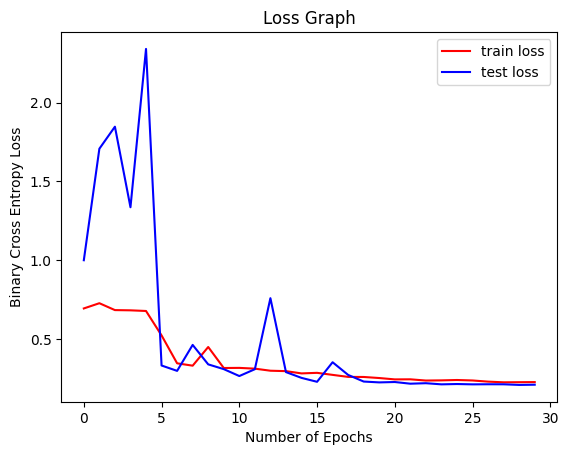

In [30]:
plt.plot(model.history.history['loss'],'r',label='train loss')
plt.plot(model.history.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Loss Graph')
plt.legend()
plt.show();

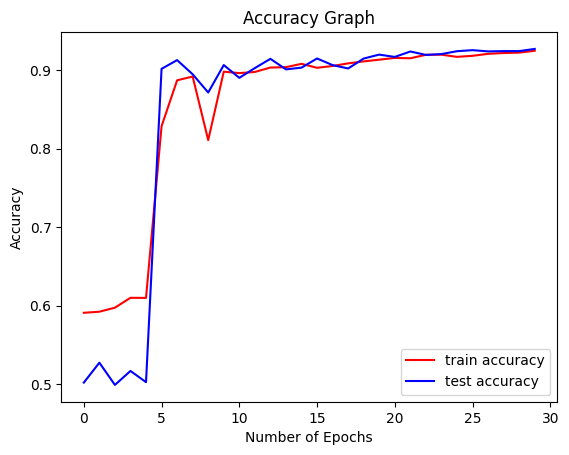

In [31]:
plt.plot(model.history.history['accuracy'],'r',label='train accuracy')
plt.plot(model.history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show();

In [32]:
loss, acc = model.evaluate(test_image_generator,verbose=0)
print("Test Binary Crossentropy Loss:", loss)
print("Test Accuracy:", acc)

Test Binary Crossentropy Loss: 0.21624918282032013
Test Accuracy: 0.9243936538696289


In [33]:
test_predictions = model.predict(test_image_generator)
test_predictions

495/495 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step


array([[0.005188  ],
       [0.00556837],
       [0.900031  ],
       ...,
       [0.9002648 ],
       [0.90339345],
       [0.90303904]], dtype=float32)

In [34]:
test_predictions = list(map(lambda x: 1 if x > 0.5 else 0,test_predictions))
test_predictions[:5]

[0, 0, 1, 0, 1]

Confusion Matrix:
[[7109  843]
 [ 334 7546]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7952
           1       0.90      0.96      0.93      7880

    accuracy                           0.93     15832
   macro avg       0.93      0.93      0.93     15832
weighted avg       0.93      0.93      0.93     15832



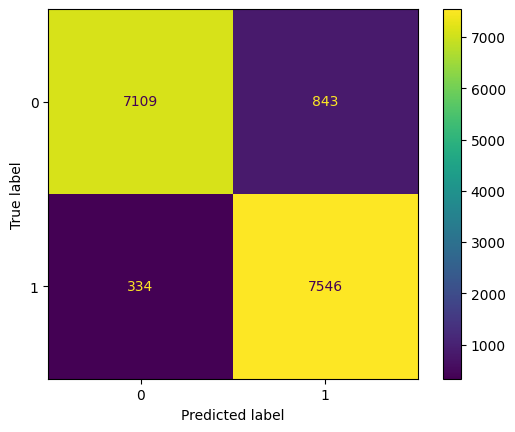

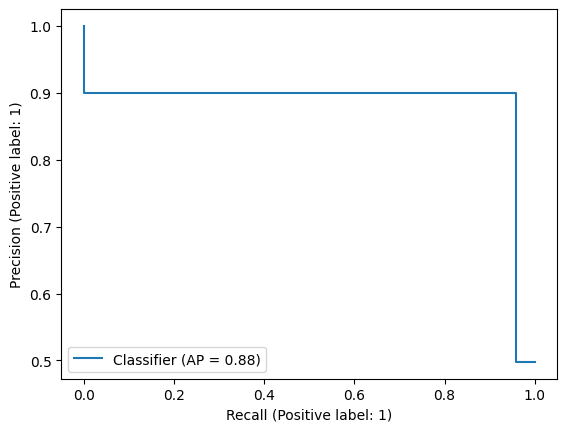

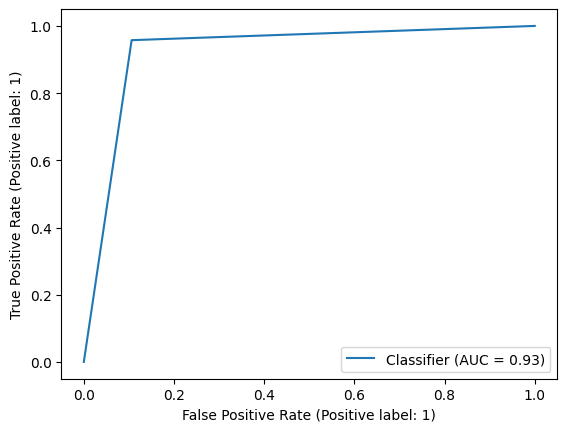

In [35]:
print("Confusion Matrix:")
print(confusion_matrix(test_image_generator.classes,test_predictions))
print("Classification Report:")
print(classification_report(test_image_generator.classes,test_predictions))
ConfusionMatrixDisplay.from_predictions(test_image_generator.classes,test_predictions)
PrecisionRecallDisplay.from_predictions(test_image_generator.classes,test_predictions)
RocCurveDisplay.from_predictions(test_image_generator.classes,test_predictions)
plt.show()

The CNN model has achieved a remarkable accuracy of about 93% on the test set.

## Model Inference

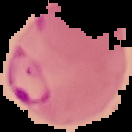

In [36]:
parasitized_random_img = load_img("/kaggle/input/files1/Malaria Cells/single_prediction/Parasitised.png",target_size=final_img_shape)
parasitized_random_img

In [37]:
parasitized_random_img = img_to_array(parasitized_random_img)
parasitized_random_img.shape

(132, 132, 3)

In [38]:
parasitized_random_img = np.expand_dims(parasitized_random_img,axis=0)
parasitized_random_img.shape

(1, 132, 132, 3)

In [39]:
pred = model.predict(parasitized_random_img)
pred = [1 if pred > 0.5 else 0][0]
 
if pred == 0:
    print("The patient is infected with malaria.")
else:
    print("The patient is not infected with malaria.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
The patient is infected with malaria.


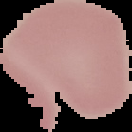

In [40]:
uninfected_random_img = "/kaggle/input/files1/Malaria Cells/single_prediction/Uninfected.png"
uninfected_random_img = load_img(uninfected_random_img,target_size=final_img_shape)
uninfected_random_img

In [41]:
uninfected_random_img = img_to_array(uninfected_random_img)
uninfected_random_img.shape

(132, 132, 3)

In [42]:
uninfected_random_img = np.expand_dims(uninfected_random_img,axis=0)
pred = model.predict(uninfected_random_img)
pred = [1 if pred > 0.5 else 0][0]

if pred:
    print("The patient is not infected with malaria.")
else:
    print("The patient is infected with malaria.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The patient is not infected with malaria.
